In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Import library algoritma kmeans
from sklearn.cluster import KMeans

# Import library algoritma kmedoids
from sklearn_extra.cluster import KMedoids

# Import library algoritma hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree

# Import library algoritma dbscan
from sklearn.cluster import DBSCAN

# Import library algoritma som
from sklearn_som.som import SOM

In [2]:
# Mengimport dataset, lalu memotong kolom terakhir
dataset_seeds= pd.read_csv('https://drive.google.com/uc?export=download&id=1sVgAGR32bTQaiF9GXvDwQCa5_KtN9pLe', sep="\t", error_bad_lines=False, header=None).iloc[:,0:-1]

# Menamai kolom dataset
dataset_seeds.columns= ['area','perimeter','compactness','kernel_length','kernel_width','assymmetry_coefficient','kernel_groove_length']

c:\users\lenovo\pycharmprojects\data science\venv\lib\site-packages\IPython\core\interactiveshell.py:3441: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 9: expected 8 fields, saw 10\nSkipping line 37: expected 8 fields, saw 10\nSkipping line 62: expected 8 fields, saw 9\nSkipping line 70: expected 8 fields, saw 9\nSkipping line 108: expected 8 fields, saw 9\nSkipping line 137: expected 8 fields, saw 9\nSkipping line 171: expected 8 fields, saw 9\nSkipping line 172: expected 8 fields, saw 9\nSkipping line 174: expected 8 fields, saw 9\nSkipping line 203: expected 8 fields, saw 9\nSkipping line 205: expected 8 fields, saw 9\n'


In [3]:
# Menampilkan 3 data pertama
dataset_seeds.head(3)

,area,perimeter,compactness,kernel_length,kernel_width,assymmetry_coefficient,kernel_groove_length
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825


In [4]:
# Normalisasi menggunakan standard scaler
dataset_seeds_scale = StandardScaler().fit_transform(dataset_seeds)
dataset_seeds_scale.shape

(199, 7)

In [5]:
# Menampung hasil di dalam variabel data, lalu menamai kolomnya
data= pd.DataFrame(dataset_seeds_scale, columns=dataset_seeds.columns)

# Membuat variabel untuk menampung clustering lalu menampilkan 3 data pertama
data_cluster= data.copy()
data_cluster.head(3)

,area,perimeter,compactness,kernel_length,kernel_width,assymmetry_coefficient,kernel_groove_length
0,0.117164,0.186797,0.008144,0.270860,0.123135,-1.007371,-0.408265
1,-0.013302,-0.019760,0.442341,-0.201481,0.178783,-1.827187,-0.945420
2,-0.215868,-0.386972,1.469798,-0.795861,0.189383,-0.681625,-1.211962


## K-Means

Text(0, 0.5, 'Inertia')

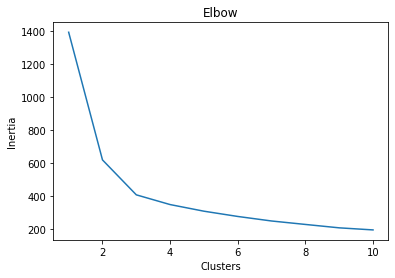

In [6]:
# Menampunng variabel kmeans dengan n_cluster 1-10 lalu menyimpannya dalam variabel clusters
clusters = []
for i in range (1,11): clusters.append((KMeans(n_clusters=i).fit(data_cluster)).inertia_)
    
# Menampilkan plot elbow untuk mencari n_cluster yang ideal
fig, ax = plt.subplots(figsize=(6,4))
sns.lineplot(x=list(range(1,11)), y=clusters, ax=ax)
ax.set_title('Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

In [7]:
# Disimpulkan 3 merupakan n_cluster ideal, membuat model kmeans dengan n_cluster= 3
kmeans_model_n3= KMeans(n_clusters=3).fit(data_cluster)

# Menampung hasil klustering kmeans di kolom data_cluster lalu menampilkan 3 data teratas
data_cluster['kmeans']= kmeans_model_n3.labels_
data_cluster.head(3)

,area,perimeter,compactness,kernel_length,kernel_width,assymmetry_coefficient,kernel_groove_length,kmeans
0,0.117164,0.186797,0.008144,0.270860,0.123135,-1.007371,-0.408265,2
1,-0.013302,-0.019760,0.442341,-0.201481,0.178783,-1.827187,-0.945420,2
2,-0.215868,-0.386972,1.469798,-0.795861,0.189383,-0.681625,-1.211962,2


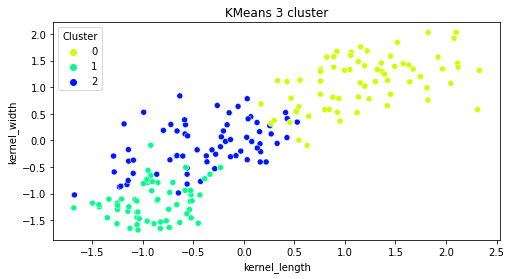

In [8]:
# Menampilkan plot scatter
plt.figure(figsize=(8,4))
sns.scatterplot(x=data_cluster['kernel_length'], y=data_cluster['kernel_width'], hue=data_cluster['kmeans'], palette=sns.color_palette('gist_rainbow',3))
plt.legend(title='Cluster')
plt.title('KMeans 3 cluster')

plt.show()

## KMedoids

In [9]:
# Karena telah mengetahui n_cluster yang pas, maka langsung dibuat modelnya
kmedoids_model= KMedoids(n_clusters=3, random_state=0).fit(data_cluster)

# Menampung hasil klustering kmedoids di kolom data_cluster lalu menampilkan 3 data teratas
data_cluster['kmedoids']= kmedoids_model.labels_
data_cluster.head(3)

,area,perimeter,compactness,kernel_length,kernel_width,assymmetry_coefficient,kernel_groove_length,kmeans,kmedoids
0,0.117164,0.186797,0.008144,0.270860,0.123135,-1.007371,-0.408265,2,2
1,-0.013302,-0.019760,0.442341,-0.201481,0.178783,-1.827187,-0.945420,2,2
2,-0.215868,-0.386972,1.469798,-0.795861,0.189383,-0.681625,-1.211962,2,2


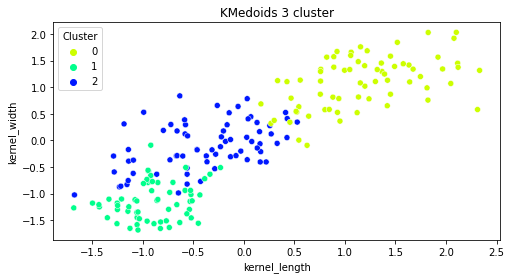

In [10]:
# Menampilkan plot scatter
plt.figure(figsize=(8,4))
sns.scatterplot(x=data_cluster['kernel_length'], y=data_cluster['kernel_width'], hue=data_cluster['kmedoids'], palette=sns.color_palette('gist_rainbow',3))
plt.legend(title='Cluster')
plt.title('KMedoids 3 cluster')
plt.show()

## Hierarchy

#### 1. Single Linkage Hierarchy

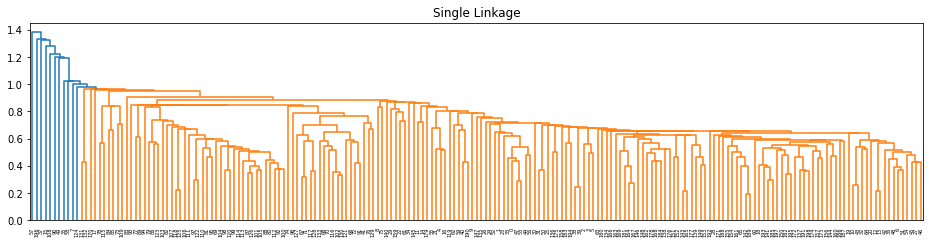

In [11]:
mergings_single= linkage(data, method="single", metric='euclidean')
dendrogram(mergings_single, ax=(plt.figure(figsize=(16,8)).add_subplot(2,1,1)))

plt.title("Single Linkage")
plt.show()

In [12]:
single_cluster_hierarchy = cut_tree(mergings_single, n_clusters=3).reshape(-1, )
data_cluster['sl_hierarchy'] = single_cluster_hierarchy
data_cluster.head(3)

,area,perimeter,compactness,kernel_length,kernel_width,assymmetry_coefficient,kernel_groove_length,kmeans,kmedoids,sl_hierarchy
0,0.117164,0.186797,0.008144,0.270860,0.123135,-1.007371,-0.408265,2,2,0
1,-0.013302,-0.019760,0.442341,-0.201481,0.178783,-1.827187,-0.945420,2,2,0
2,-0.215868,-0.386972,1.469798,-0.795861,0.189383,-0.681625,-1.211962,2,2,0


#### 2.  Complete Linkage Hierarchy

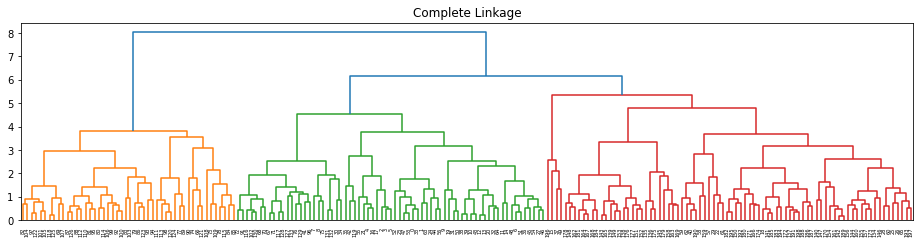

In [13]:
mergings_complete= linkage(data, method="complete", metric='euclidean')
dendrogram(mergings_complete, ax=(plt.figure(figsize=(16,8)).add_subplot(2,1,1)))
plt.title("Complete Linkage")
plt.show()

In [14]:
complete_cluster_hierarchy = cut_tree(mergings_complete, n_clusters=3).reshape(-1, )
data_cluster['cl_hierarchy'] = complete_cluster_hierarchy
data_cluster.head(3)

,area,perimeter,compactness,kernel_length,kernel_width,assymmetry_coefficient,kernel_groove_length,kmeans,kmedoids,sl_hierarchy,cl_hierarchy
0,0.117164,0.186797,0.008144,0.270860,0.123135,-1.007371,-0.408265,2,2,0,0
1,-0.013302,-0.019760,0.442341,-0.201481,0.178783,-1.827187,-0.945420,2,2,0,0
2,-0.215868,-0.386972,1.469798,-0.795861,0.189383,-0.681625,-1.211962,2,2,0,0


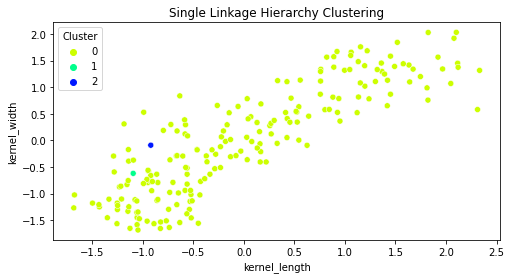

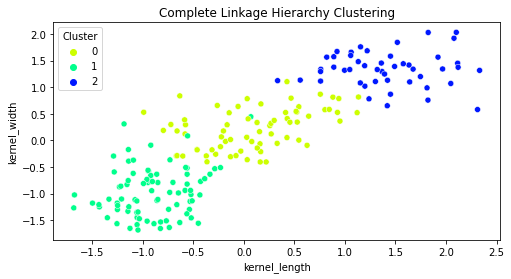

In [15]:
plt.figure(figsize=(8,4))
sns.scatterplot(x=data_cluster['kernel_length'], y=data_cluster['kernel_width'], hue=data_cluster['sl_hierarchy'], palette=sns.color_palette('gist_rainbow',3))
plt.legend(title='Cluster')
plt.title('Single Linkage Hierarchy Clustering')

plt.figure(figsize=(8,4))
sns.scatterplot(x=data_cluster['kernel_length'], y=data_cluster['kernel_width'], hue=data_cluster['cl_hierarchy'], palette=sns.color_palette('gist_rainbow',3))
plt.legend(title='Cluster')
plt.title('Complete Linkage Hierarchy Clustering')

plt.show()

## DBSCAN

In [16]:
db= DBSCAN(eps=0.925, min_samples=10, metric='euclidean')
db.fit(data)

DBSCAN(eps=0.925, min_samples=10)

In [17]:
data.index

RangeIndex(start=0, stop=199, step=1)

In [18]:
data_cluster['dbscan'] = db.labels_
data_cluster

,area,perimeter,compactness,kernel_length,kernel_width,assymmetry_coefficient,kernel_groove_length,kmeans,kmedoids,sl_hierarchy,cl_hierarchy,dbscan
0,0.117164,0.186797,0.008144,0.270860,0.123135,-1.007371,-0.408265,2,2,0,0,0
1,-0.013302,-0.019760,0.442341,-0.201481,0.178783,-1.827187,-0.945420,2,2,0,0,0
2,-0.215868,-0.386972,1.469798,-0.795861,0.189383,-0.681625,-1.211962,2,2,0,0,0
3,-0.370368,-0.501725,1.061395,-0.721281,0.300679,-0.981475,-1.252656,2,2,0,0,0
4,0.419297,0.301550,1.401014,0.033559,0.785615,-1.597530,-0.499825,2,2,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
194,-0.936866,-1.067843,0.321970,-1.143902,-0.753989,-0.046488,-1.120402,2,2,0,1,0
195,-1.266465,-1.312651,-0.847353,-1.137122,-1.246874,0.426457,-0.849790,1,1,0,1,0
196,-0.590100,-0.715932,0.751868,-0.920162,-0.088859,3.145549,-0.741952,1,1,2,1,-1
197,-1.057032,-1.060193,-0.804363,-1.058022,-1.138227,-0.068977,-0.766368,1,1,0,1,0


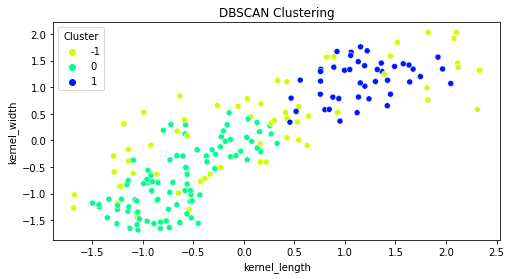

In [19]:
plt.figure(figsize=(8,4))
sns.scatterplot(x=data_cluster['kernel_length'], y=data_cluster['kernel_width'], hue=data_cluster['dbscan'], palette=sns.color_palette('gist_rainbow',3))
plt.legend(title='Cluster')
plt.title('DBSCAN Clustering')
plt.show()

## SOM

In [20]:
data_som= np.array(data.iloc[:,3:5])
model_som= SOM(m=2, n=2, dim=2)

model_som.fit(data_som)
predictions_som = model_som.predict(data_som)

data_cluster['som']= predictions_som
data_cluster.head(3)

,area,perimeter,compactness,kernel_length,kernel_width,assymmetry_coefficient,kernel_groove_length,kmeans,kmedoids,sl_hierarchy,cl_hierarchy,dbscan,som
0,0.117164,0.186797,0.008144,0.270860,0.123135,-1.007371,-0.408265,2,2,0,0,0,0
1,-0.013302,-0.019760,0.442341,-0.201481,0.178783,-1.827187,-0.945420,2,2,0,0,0,3
2,-0.215868,-0.386972,1.469798,-0.795861,0.189383,-0.681625,-1.211962,2,2,0,0,0,2


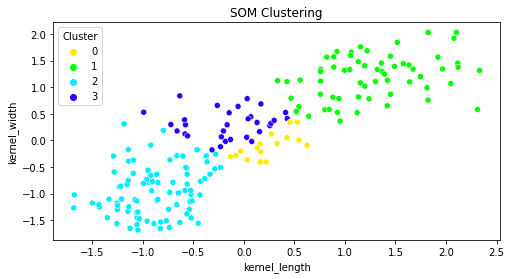

In [21]:
plt.figure(figsize=(8,4))
sns.scatterplot(x=data_cluster['kernel_length'], y=data_cluster['kernel_width'], hue=data_cluster['som'], palette=sns.color_palette('gist_rainbow',4))
plt.legend(title='Cluster')
plt.title('SOM Clustering')
plt.show()

In [22]:
data_cluster

,area,perimeter,compactness,kernel_length,kernel_width,assymmetry_coefficient,kernel_groove_length,kmeans,kmedoids,sl_hierarchy,cl_hierarchy,dbscan,som
0,0.117164,0.186797,0.008144,0.270860,0.123135,-1.007371,-0.408265,2,2,0,0,0,0
1,-0.013302,-0.019760,0.442341,-0.201481,0.178783,-1.827187,-0.945420,2,2,0,0,0,3
2,-0.215868,-0.386972,1.469798,-0.795861,0.189383,-0.681625,-1.211962,2,2,0,0,0,2
3,-0.370368,-0.501725,1.061395,-0.721281,0.300679,-0.981475,-1.252656,2,2,0,0,0,3
4,0.419297,0.301550,1.401014,0.033559,0.785615,-1.597530,-0.499825,2,2,0,0,-1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,-0.936866,-1.067843,0.321970,-1.143902,-0.753989,-0.046488,-1.120402,2,2,0,1,0,2
195,-1.266465,-1.312651,-0.847353,-1.137122,-1.246874,0.426457,-0.849790,1,1,0,1,0,2
196,-0.590100,-0.715932,0.751868,-0.920162,-0.088859,3.145549,-0.741952,1,1,2,1,-1,2
197,-1.057032,-1.060193,-0.804363,-1.058022,-1.138227,-0.068977,-0.766368,1,1,0,1,0,2
